In [ ]:
import pickle 
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in_features = open('/content/drive/MyDrive/pkl-files/features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('/content/drive/MyDrive/pkl-files/labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
#y = to_categorical(y)

In [ ]:
print(len(x))
print(len(y))

3008
3008


In [ ]:
print(x.shape)

(3008, 224, 224, 3)


In [ ]:
print(y.shape)

(3008,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2105, 224, 224, 3)
(2105,)


In [ ]:
classes = 3

image_input = Input(shape=(224, 224, 3))

model = VGG19(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model.get_layer('fc2').output
# x = Flatten(name='flatten')(last_layer)
out = Dense(classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

print(image_input.shape)

574726144/574710816 [==============================] - 8s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

t = time.time()

hist = custom_vgg_model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))


Epoch 1/20
53/53 - 43s - loss: 1.2048 - accuracy: 0.5249 - val_loss: 0.6076 - val_accuracy: 0.8266 - 43s/epoch - 802ms/step
Epoch 2/20
53/53 - 23s - loss: 0.7428 - accuracy: 0.6752 - val_loss: 0.7202 - val_accuracy: 0.6603 - 23s/epoch - 428ms/step
Epoch 3/20
53/53 - 23s - loss: 0.6084 - accuracy: 0.7298 - val_loss: 0.4668 - val_accuracy: 0.7791 - 23s/epoch - 429ms/step
Epoch 4/20
53/53 - 23s - loss: 0.5318 - accuracy: 0.7797 - val_loss: 0.3772 - val_accuracy: 0.8432 - 23s/epoch - 428ms/step
Epoch 5/20
53/53 - 23s - loss: 0.4383 - accuracy: 0.8165 - val_loss: 0.3601 - val_accuracy: 0.8622 - 23s/epoch - 428ms/step
Epoch 6/20
53/53 - 23s - loss: 0.4457 - accuracy: 0.8195 - val_loss: 0.3860 - val_accuracy: 0.8409 - 23s/epoch - 428ms/step
Epoch 7/20
53/53 - 23s - loss: 0.3987 - accuracy: 0.8379 - val_loss: 0.7711 - val_accuracy: 0.6413 - 23s/epoch - 427ms/step
Epoch 8/20
53/53 - 23s - loss: 0.3892 - accuracy: 0.8432 - val_loss: 0.6327 - val_accuracy: 0.7197 - 23s/epoch - 427ms/step
Epoch 9/

In [ ]:
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test , batch_size=10, verbose=2)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 - 18s - loss: 0.2474 - accuracy: 0.9037 - 18s/epoch - 198ms/step
[INFO] loss=0.2474, accuracy: 90.3654%


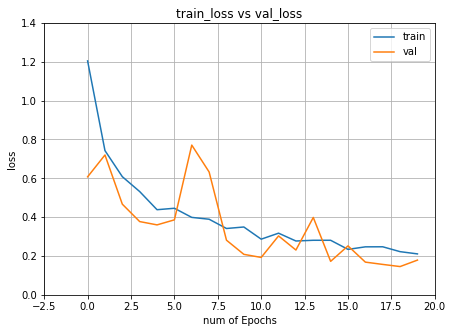

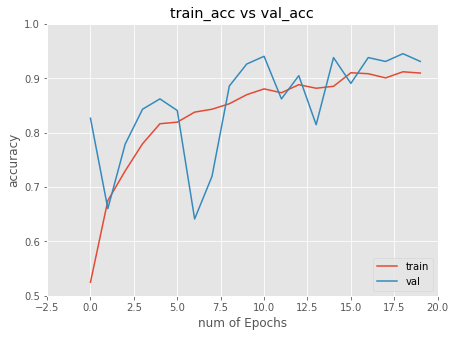

In [ ]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['ggplot'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])